In [1]:
import sys, os
sys.path.insert(0, os.path.abspath('../'))

In [22]:
%pylab inline
from retinanet.backbone import load_backbone

from keras.utils.vis_utils import model_to_dot, plot_model
from IPython.display import display
from IPython.display import SVG, Image

Populating the interactive namespace from numpy and matplotlib


# Load Backbone

In [103]:
resnet50 = load_backbone('resnet101')
weights = resnet50.download_imagenet()
resnet50 = resnet50.create_backbone()
resnet50.load_weights(weights, by_name=True, skip_mismatch=False)

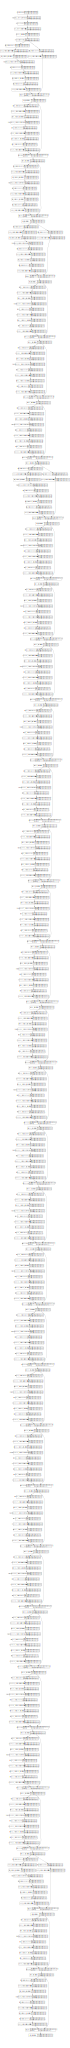

In [102]:
# # Visualization
SVG(model_to_dot(resnet50, show_shapes=True).create(prog='dot', format='svg'))

# Calculate output

먼저 CNN의 output을 계산하는 공식은 다음과 같습니다 .

$$ \begin{align} \text{output width} &= \frac{W - F_w + 2P}{S_w} + 1  \\
\text{output height} &= \frac{H - F_h + 2P}{S_h} + 1  
\end{align} $$

* $ W $ : Input width
* $ H $ : Input height
* $ F_w $ : Filter width
* $ F_h $ : Filter height
* $ S_w $ : Horizontal stride
* $ S_h $ : Vertical stride
* $ P $ : Padding

Bottom-up으로부터 나온 CNN의 feature maps에 Top-down을 할때 1 x 1 convolution을 적용합니다.<br>
따라서 $ F = 1 $  이 됩니다. 

ResNet은 처음 최초 레이어에서 7 x 7 convolution with stride 2 를 input 값에다 적용해서 2배 down sampling을 하게 됩니다.<br>
이후 identity block 이후 반복적으로 2배 downsampling을 하게 됩니다.

![Resnet](images/resnet.png)

In [104]:
images = np.zeros((1, 800, 1201, 3))
outputs = resnet50.predict_on_batch(images)

for output in outputs:
    print(output.shape)

(1, 200, 301, 256)
(1, 100, 151, 512)
(1, 50, 76, 1024)
(1, 25, 38, 2048)


In [106]:
def cal_shape(shape, x):
    return (shape + 2**x - 1)/(2**x) 

for level in [2, 3, 4, 5, 6, 7]:
    print(level, ':', cal_shape(np.array([800, 1201]), level).astype(np.int32))

2 : [200 301]
3 : [100 151]
4 : [50 76]
5 : [25 38]
6 : [13 19]
7 : [ 7 10]
